## Convergence Testing:
### K-Point Convergence:
Using a plane-wave energy cutoff of 520 eV, and Monkhorst pack k-grid densities of $i$ x $i$ x $i$ for $i$ ranging from 1 to 8.

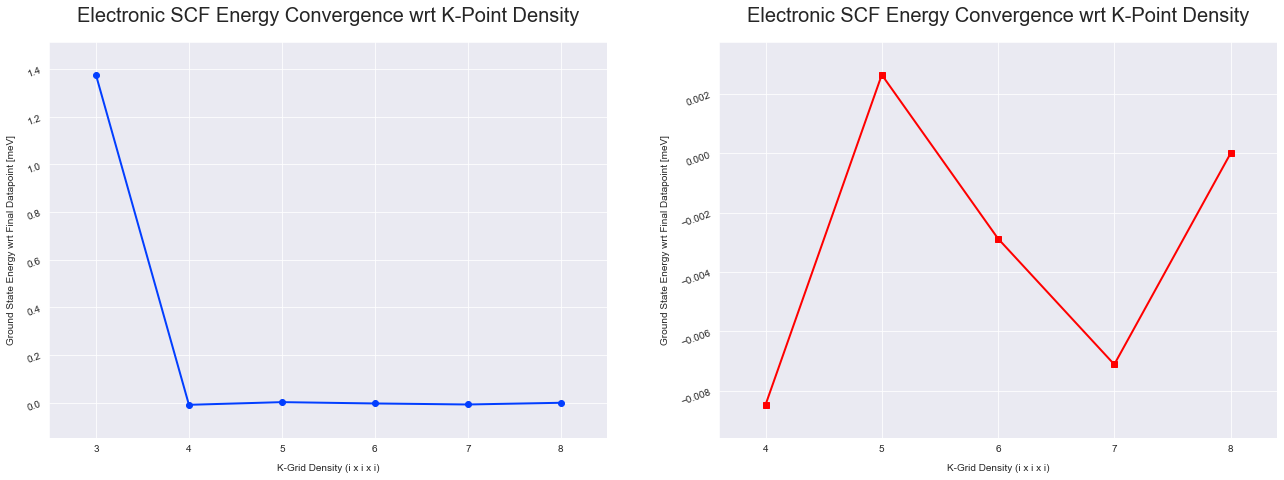

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette(sns.color_palette('bright'))
sns.set_style('darkgrid')
kdensity = np.arange(3, 8.1)
kconv_energies = np.array([float(line.rstrip('\n'))
                           for line in open('VASP_Outputs/kconv_energy_list.txt')])

f, ax = plt.subplots(1, 2, figsize=(22, 10))
ax[0].plot(kdensity, 1000*(kconv_energies-kconv_energies[-1]), #color='steelblue',
           marker="o", label="Convergence E0", linewidth=2, linestyle='-')
ax[0].grid(True)
ax[0].set_xlabel("K-Grid Density (i x i x i)", labelpad=10)
ax[0].set_ylabel("Ground State Energy wrt Final Datapoint [meV]", labelpad=10)
ax[0].set_title("Electronic SCF Energy Convergence wrt K-Point Density",
                fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax[0].margins(0.1)
ax[0].ticklabel_format(useOffset=False)
plt.setp(ax[0].get_yticklabels(), rotation=20)
f.subplots_adjust(bottom=0.3, top=0.85)  # Adjusting specific margins
ax[1].ticklabel_format(useOffset=False)
ax[1].plot(kdensity[1:], 1000*(kconv_energies[1:]-kconv_energies[-1]), color='red',
           marker="s", label="Convergence E0", linewidth=2)
ax[1].grid(True)
ax[1].set_xlabel("K-Grid Density (i x i x i)", labelpad=10)
ax[1].set_ylabel("Ground State Energy wrt Final Datapoint [meV]", labelpad=10)
ax[1].set_title("Electronic SCF Energy Convergence wrt K-Point Density",
                fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax[1].margins(0.1)
plt.setp(ax[1].get_yticklabels(), rotation=20)
plt.savefig('kpoint_Convergence.png')

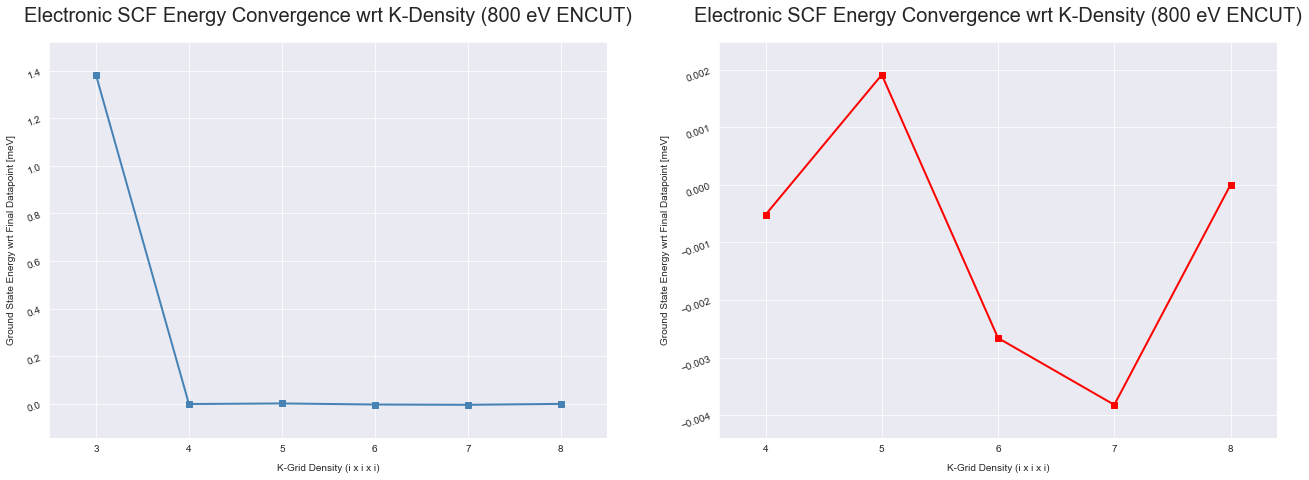

In [4]:
%matplotlib inline
kdensity = np.arange(3, 8.1)
kconv_energies_newencut = np.array([float(line.rstrip('\n'))
                                    for line in open('VASP_Outputs/kenconv_energy_list.txt')])
kconv_newencut = np.zeros([6,])
for i in range(len(kdensity)): # Selecting energies for ENCUT of 800 eV
    kconv_newencut[i] = kconv_energies_newencut[i*13+12]
 
f2, ax2 = plt.subplots(1, 2, figsize=(22, 10))
ax2[0].plot(kdensity, 1000*(kconv_newencut-kconv_newencut[-1]), color='steelblue',
           marker="s", label="Convergence E0", linewidth=2)
ax2[0].grid(True)
ax2[0].set_xlabel("K-Grid Density (i x i x i)", labelpad=10)
ax2[0].set_ylabel("Ground State Energy wrt Final Datapoint [meV]", labelpad=10)
ax2[0].set_title("Electronic SCF Energy Convergence wrt K-Density (800 eV ENCUT)",
                fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax2[0].margins(0.1)
ax2[0].ticklabel_format(useOffset=False)
plt.setp(ax2[0].get_yticklabels(), rotation=20)
f2.subplots_adjust(bottom=0.3, top=0.85)  # Adjusting specific margins
ax2[1].ticklabel_format(useOffset=False)
ax2[1].plot(kdensity[1:], 1000*(kconv_newencut[1:]-kconv_newencut[-1]), color='red',
           marker="s", label="Convergence E0", linewidth=2)
ax2[1].grid(True)
ax2[1].set_xlabel("K-Grid Density (i x i x i)", labelpad=10)
ax2[1].set_ylabel("Ground State Energy wrt Final Datapoint [meV]", labelpad=10)
ax2[1].set_title("Electronic SCF Energy Convergence wrt K-Density (800 eV ENCUT)",
                fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax2[1].margins(0.1)
plt.setp(ax2[1].get_yticklabels(), rotation=20)
plt.show()

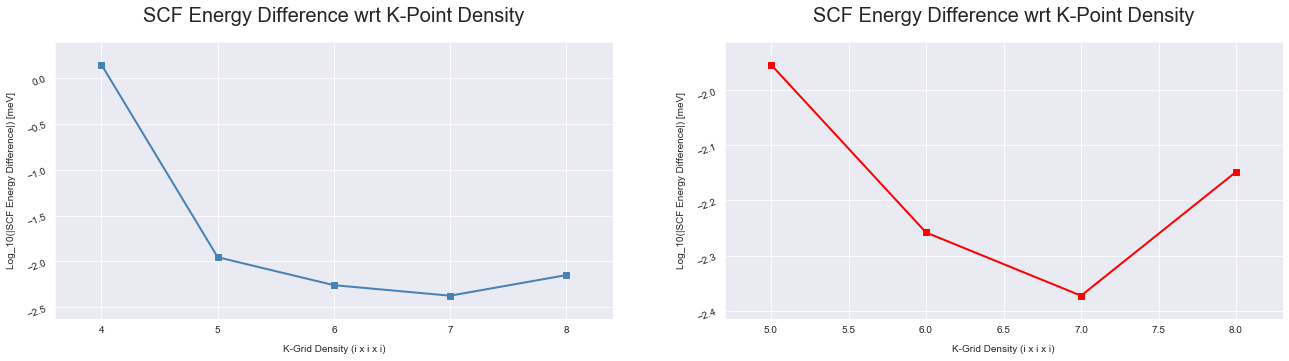

In [7]:
ediff = np.array([kconv_energies[i]-kconv_energies[i-1]
                  for i in range(1, len(kconv_energies))])

f1, ax1 = plt.subplots(1, 2, figsize=(22, 7))
ax1[0].plot(kdensity[1:], np.log10(1000*abs(ediff)),
            color='steelblue', marker="s", label="Convergence E0", linewidth=2)
ax1[0].grid(True)
ax1[0].set_xlabel("K-Grid Density (i x i x i)", labelpad=10)
ax1[0].set_ylabel("Log_10(|SCF Energy Difference|) [meV]", labelpad=10)
ax1[0].set_title("SCF Energy Difference wrt K-Point Density",
                 fontsize=20, pad=20)  # pad is offset of title from plot
ax1[0].ticklabel_format(useOffset=False)
plt.setp(ax1[0].get_yticklabels(), rotation=20)
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax1[0].margins(0.1)
f1.subplots_adjust(bottom=0.3, top=0.85)  # Adjusting specific margins
ax1[1].plot(kdensity[2:], np.log10(abs(1000*ediff[1:])),
            color='red', marker="s", label="Convergence E0", linewidth=2)
ax1[1].grid(True)
ax1[1].set_xlabel("K-Grid Density (i x i x i)", labelpad=10)
ax1[1].set_ylabel("Log_10(|SCF Energy Difference|) [meV]", labelpad=10)
ax1[1].set_title("SCF Energy Difference wrt K-Point Density",
                 fontsize=20, pad=20)  # pad is offset of title from plot
ax1[1].ticklabel_format(useOffset=False)
plt.setp(ax1[1].get_yticklabels(), rotation=20)
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax1[1].margins(0.1)
plt.show()

### Plane Wave Energy Cutoff Convergence: 
Using a Monkhorst pack k-grid density of 5 x 5 x 5, the plane wave energy cutoff was varied from 200 eV to 700 eV.

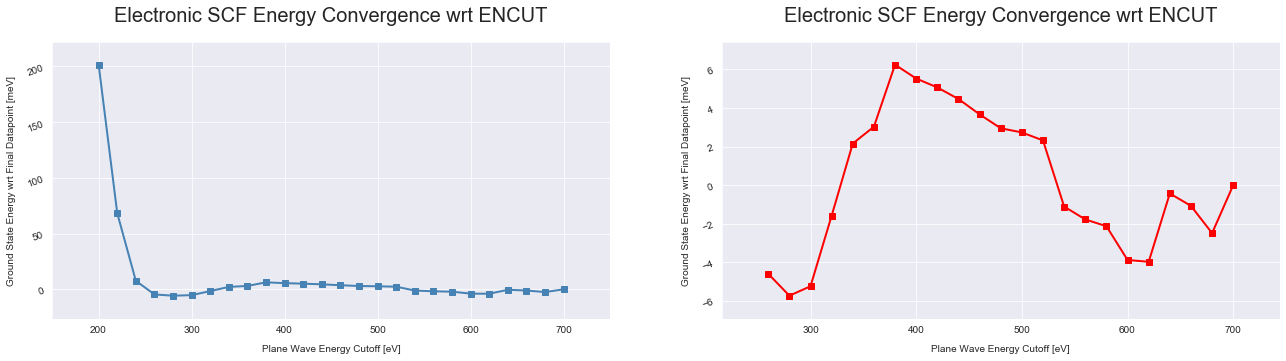

In [8]:
ecutoff = np.arange(200, 700.5, 20)
econv_energies = np.array([float(line.rstrip('\n'))
                           for line in open('VASP_Outputs/econv_energy_list.txt')])
sns.set_style('darkgrid')
fec, axec = plt.subplots(1, 2, figsize=(22, 7))
axec[0].plot(ecutoff, 1000*(econv_energies-econv_energies[-1]), color='steelblue',
             marker="s", label="Convergence E0", linewidth=2)
axec[0].grid(True)
axec[0].set_xlabel("Plane Wave Energy Cutoff [eV]", labelpad=10)
axec[0].set_ylabel("Ground State Energy wrt Final Datapoint [meV]", labelpad=10)
axec[0].ticklabel_format(useOffset=False)
plt.setp(axec[0].get_yticklabels(), rotation=20)
axec[0].set_title("Electronic SCF Energy Convergence wrt ENCUT",
                  fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
axec[0].margins(0.1)
fec.subplots_adjust(bottom=0.3, top=0.85)  # Adjusting specific margins
axec[1].plot(ecutoff[3:], 1000*(econv_energies[3:]-econv_energies[-1]), color='red',
             marker="s", label="Convergence E0", linewidth=2)
axec[1].grid(True)
axec[1].set_xlabel("Plane Wave Energy Cutoff [eV]", labelpad=10)
axec[1].set_ylabel("Ground State Energy wrt Final Datapoint [meV]", labelpad=10)
axec[1].ticklabel_format(useOffset=False)
plt.setp(axec[1].get_yticklabels(), rotation=20)
axec[1].set_title("Electronic SCF Energy Convergence wrt ENCUT",
                  fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
axec[1].margins(0.1)
plt.savefig('ENCUT_Convergence.png')
plt.show()


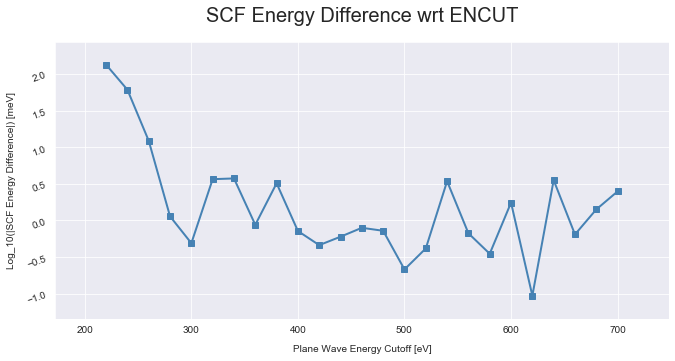

In [12]:
econv_energies = np.array([float(line.rstrip('\n'))
                           for line in open('VASP_Outputs/econv_energy_list.txt')])
ecdiff = np.array([econv_energies[i]-econv_energies[i-1]
                   for i in range(1, len(econv_energies))])

fec1, axec1 = plt.subplots(1, 1, figsize=(11, 7))
axec1.plot(ecutoff[1:], np.log10(1000*abs(ecdiff)), color='steelblue',
           marker="s", label="Convergence E0", linewidth=2)
axec1.grid(True)
axec1.set_xlabel("Plane Wave Energy Cutoff [eV]", labelpad=10)
axec1.set_ylabel("Log_10(|SCF Energy Difference|) [meV]", labelpad=10)
axec1.set_title("SCF Energy Difference wrt ENCUT", fontsize=20,
                pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
axec1.margins(0.1)
fec1.subplots_adjust(bottom=0.3, top=0.85)  # Adjusting specific margins
axec1.ticklabel_format(useOffset=False)
plt.setp(axec1.get_yticklabels(), rotation=20)
#axec1[1].plot(ecutoff[2:], np.log10(abs(ecdiff[1:])), color='red', marker="s", label="Convergence E0", linewidth = 2)
# axec1[1].grid(True)
#axec1[1].set_xlabel("Plane Wave Energy Cutoff [eV]", labelpad = 10)
#axec1[1].set_ylabel("Log_10(|SCF Energy Difference|) [eV]", labelpad = 10)
# axec1[1].set_title("SCF Energy Difference wrt ENCUT", fontsize = 20, pad = 20) # pad is offset of title from plot
# axec1[1].margins(0.1)   # Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
plt.show()

**Note:**  
"The PREC-tag determines the energy cutoff ENCUT, _**if ENCUT is not specified in the INCAR file**_. For PREC=Low, ENCUT will be set to the maximal ENMIN value found on the POTCAR file. For PREC=Medium and PREC=Accurate, ENCUT will be set to maximal ENMAX value found on the POTCAR file. In general, an energy cutoff greater than 130% ENMAX is only required for accurate evaluation of quantities related to the stress tensor (e.g. elastic properties)."  
Note that in the case of $Cs_2 AgSbBr_6$, the largest ENMAX in the POTCAR was 250 eV.

## 2D Convergence Plot

K-grid density range from 3 x 3 x 3 to 8 x 8 x 8, with ENCUT varying from 200 to 800 eV in 50 eV increments

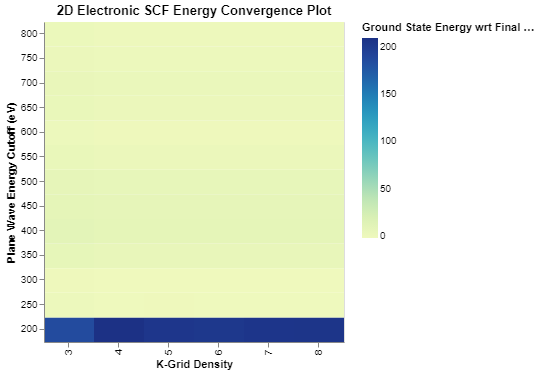

In [26]:
import altair as alt
import numpy as np
import pandas as pd

kenconv_energies = np.array([float(line.rstrip('\n'))
                             for line in open('VASP_Outputs/kenconv_energy_list.txt')])*1000
kgrid_density = np.arange(3, 9)
encut_range = np.arange(200, 801, 50)

kenarray = np.zeros((len(encut_range), len(kgrid_density)))
# Array of energy values
for i in range(len(kgrid_density)):
    kenarray[:, i] = kenconv_energies[i *
                                      len(encut_range): (i+1)*len(encut_range)]

x, y = np.meshgrid(kgrid_density, encut_range)

# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'K-Grid Density': x.ravel(),
                        'Plane Wave Energy Cutoff (eV)': y.ravel(),
                        'Ground State Energy wrt Final Datapoint (meV)': kenarray.ravel()-kenarray.ravel()[-1]})

alt.Chart(source,width=300,height=320,title = '2D Electronic SCF Energy Convergence Plot').mark_rect().encode(
    x='K-Grid Density:O',
    y=alt.Y("Plane Wave Energy Cutoff (eV)", sort='descending', type='ordinal'),
    color='Ground State Energy wrt Final Datapoint (meV):Q'
)

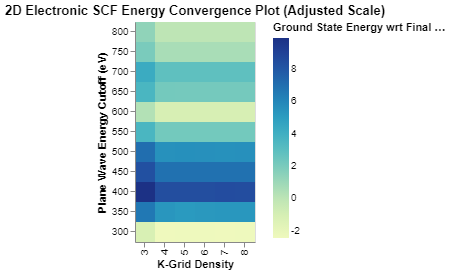

In [27]:
source1 = pd.DataFrame({'K-Grid Density': x.ravel()[len(kgrid_density)*2:],
                        'Plane Wave Energy Cutoff (eV)': y.ravel()[len(kgrid_density)*2:],
                        'Ground State Energy wrt Final Datapoint (meV)': kenarray.ravel()[len(kgrid_density)*2:]-kenarray.ravel()[-1]})

alt.Chart(source1,title = '2D Electronic SCF Energy Convergence Plot (Adjusted Scale)').mark_rect().encode(
    x='K-Grid Density:O',
    y=alt.Y("Plane Wave Energy Cutoff (eV)", sort='descending', type='ordinal'),
    color='Ground State Energy wrt Final Datapoint (meV):Q',
)

**Seems that the convergence effect of the plane wave energy cutoff is much more significant than that of the k-grid density.** For the k-grid density, a grid of 2 x 2 x 2 is too small for the SCF energy to be calculated (i.e. to be 'self-consistent' within the NELM limit of 100 electronic SCF loops), and that 3 x 3 x 3 is approximately 1.4 meV off the converged energy value for higher k-densities (see 'K-Point Convergence' above), but that k-grid densities of above 4 x 4 x 4 do not significantly improve the convergence of the final energy.
Hence, it is concluded that a k-density of 5 x 5 x 5 (or 4 x 4 x 4) and an ENCUT of +500 eV is sufficient to obtain a converged final energy from VASP for $Cs_2 AgSbBr_6$.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

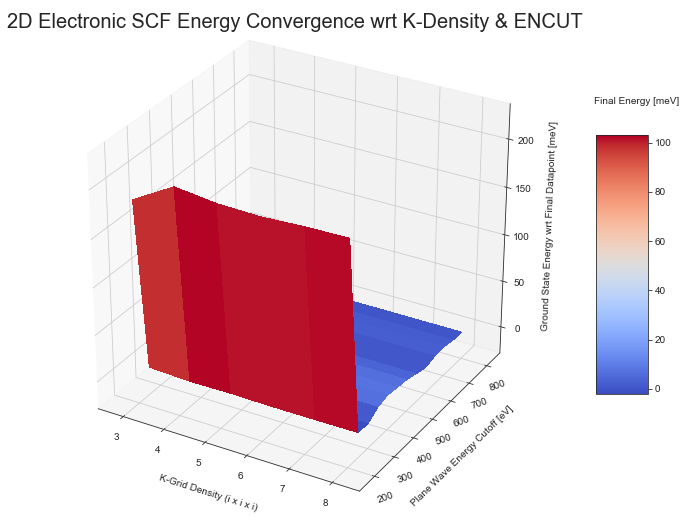

In [30]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

%matplotlib widget
fig = plt.figure(figsize = (12,9.5))
ax = fig.gca(projection='3d')

sns.set_style('white')
# Plot the surface.
surf = ax.plot_surface(x, y, kenarray-kenarray[-1,-1], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.grid(True)
ax.set_xlabel("K-Grid Density (i x i x i)", labelpad=10)
ax.set_zlabel("Ground State Energy wrt Final Datapoint [meV]", labelpad=10)
ax.set_ylabel("Plane Wave Energy Cutoff [eV]", labelpad=10)
ax.set_title("2D Electronic SCF Energy Convergence wrt K-Density & ENCUT",
                fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax.margins(0.1)
ax.ticklabel_format(useOffset=False)
plt.setp(ax.get_yticklabels(), rotation=20)
f.subplots_adjust(bottom=0.3, top=0.85)  # Adjusting specific margins

# Add a color bar which maps values to colors.
cb = fig.colorbar(surf, shrink=0.5, aspect=5)
cb.set_label('Final Energy [meV]', labelpad = -35, y = 1.15, rotation = 0)
plt.show()

In [35]:
%matplotlib widget
fig1 = plt.figure(figsize=(12,9.5))
ax1 = fig1.gca(projection='3d')

# Plot the surface.
surf = ax1.plot_surface(x[2:], y[2:], kenarray[2:]-kenarray[-1,-1], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax1.grid(True)
ax1.set_xlabel("K-Grid Density (i x i x i)", labelpad=10)
ax1.set_zlabel("Ground State Energy wrt Final Datapoint [meV]", labelpad=10)
ax1.set_ylabel("Plane Wave Energy Cutoff [eV]", labelpad=10)
ax1.set_title("2D Electronic SCF Energy Convergence wrt K-Density & ENCUT",
                fontsize=20, pad=20)  # pad is offset of title from plot
# Adjusting the in-plot margins (i.e. the gap between the final x value and the x limit of the graph)
ax1.margins(0.1)
ax1.ticklabel_format(useOffset=False)
plt.setp(ax1.get_yticklabels(), rotation=20)
#fig1.subplots_adjust(bottom=0.3, top=0.85)  # Adjusting specific margins

# Add a color bar which maps values to colors.
cb = fig1.colorbar(surf, shrink=0.5, aspect=5)
cb.set_label('Energy Difference [meV]', labelpad = -35, y = 1.15, rotation = 0)
#plt.savefig('3D_Conv_Plot')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …